# Questions Asked from the data

1. Season wise distribution of wickets
2. Stadium-wise Distribution of wickets
3. Top 10 highest wicket taker in ipl
4. Top 10 highest Run getter in ipl
5. Top 10 highest Run getter in ipl
6. highest number of 100s
7. Top 10 highest individual score
8. Bowlers Stats based on Season
9. Batsmans stats based on season
9. Comparing Stadiums


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\kartik sonagelaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('FINAL.csv')

In [4]:
df.shape

(200663, 30)

In [5]:
#df=df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1','Unnamed: 0.1.1.1.1.1'],axis=1)

In [6]:
df.head(2)

,match_id,innings,Unnamed: 2,season,start_date,venue,ball,batting_team,bowling_team,striker,...,player_dismissed,other_wicket_type,other_player_dismissed,bowler_type,Total_runs,Extraballs,over_type,number_of_wicket,number_of_dotballs,Batting_type
0,335982,1,0,2008,2008-04-18,Chinnaswamy Stadium(Banglore),0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,...,0,NaN,NaN,Right_arm_medium,1,0.0,PowerPlay,1.0,0.0,Left_hand_batsman
1,335982,1,112,2008,2008-04-18,Chinnaswamy Stadium(Banglore),0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,0,NaN,NaN,Right_arm_medium,0,0.0,PowerPlay,1.0,1.0,Right_hand_batsman


In [7]:
df.columns

Index(['match_id', 'innings', 'Unnamed: 2', 'season', 'start_date', 'venue',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'bowler_type',
       'Total_runs', 'Extraballs', 'over_type', 'number_of_wicket',
       'number_of_dotballs', 'Batting_type'],
      dtype='object')

# Season-wise Distribution of wickets 

Text(0.5, 1.0, 'Wickets Distribution Over the years')

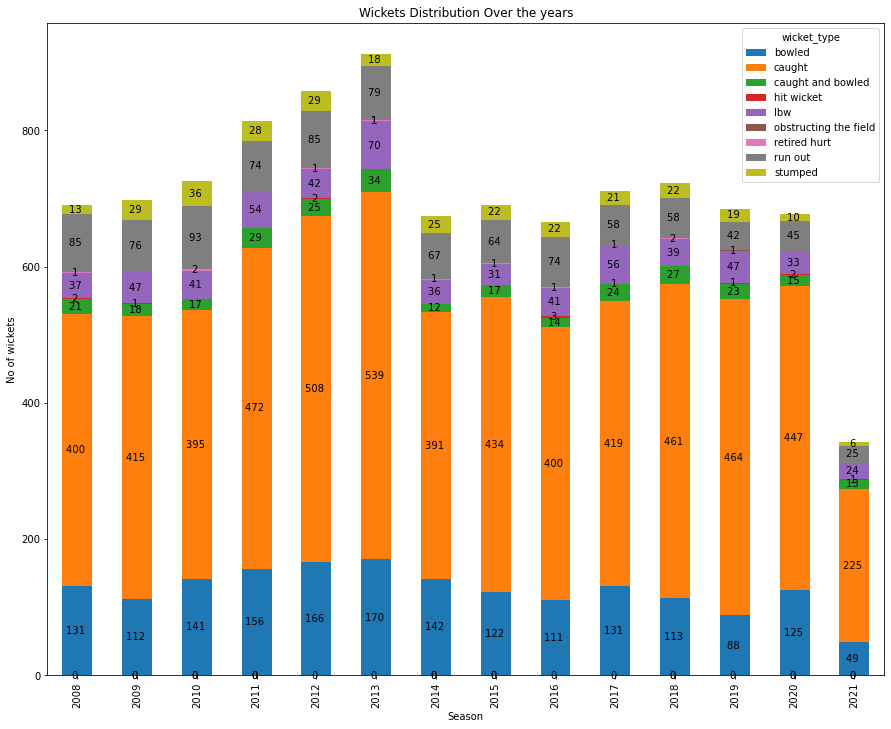

In [8]:
data=df.groupby('season')['wicket_type'].value_counts()
df2 = data.unstack().fillna(0)
ax=df2.plot.bar(stacked=True,figsize=(15,12))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} '.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
#df.plot.pie(subplots=True,figsize=(150,1000))
plt.xlabel('Season')
plt.ylabel('No of wickets')
plt.title('Wickets Distribution Over the years')

# Stadium-wise Distribution of wickets

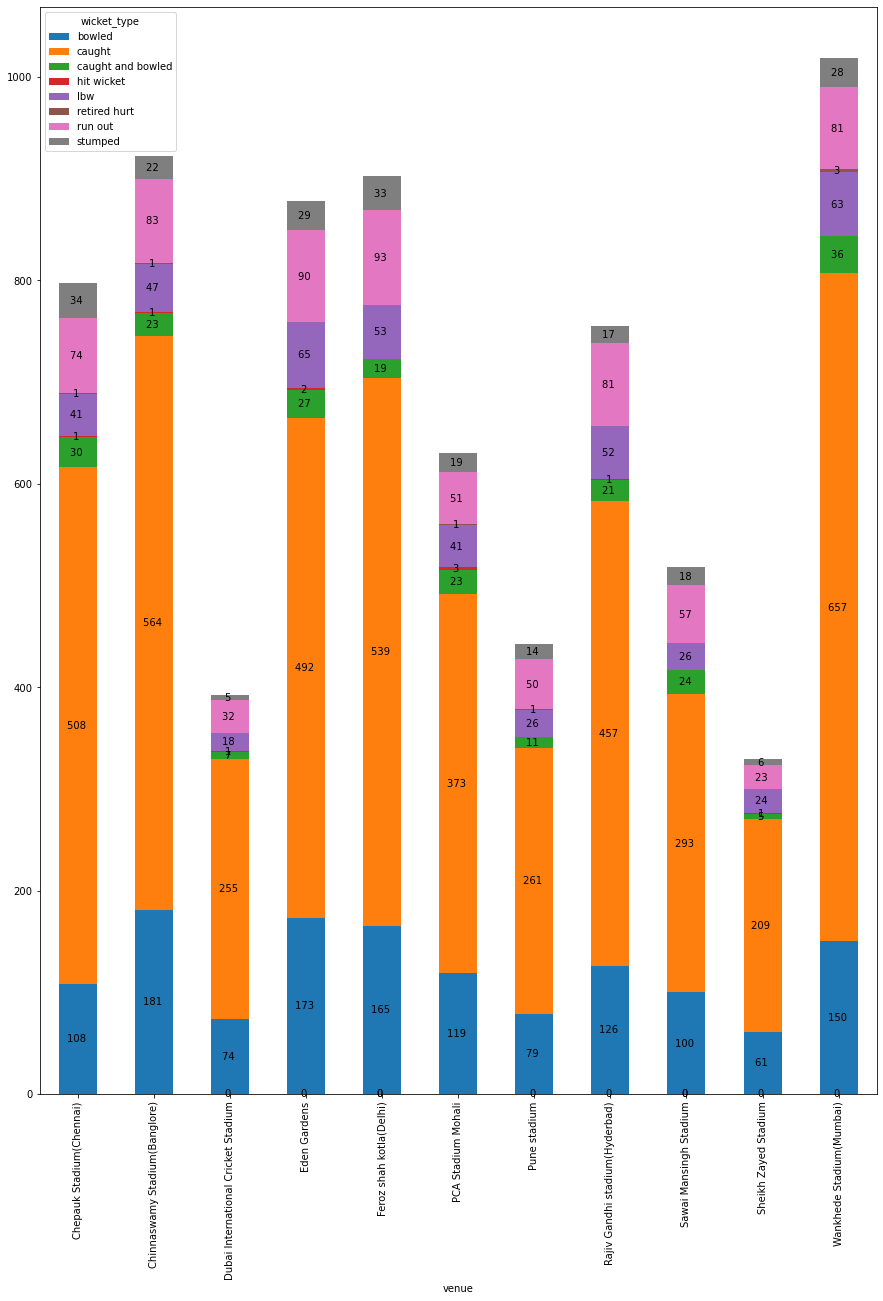

In [9]:
df3=df.groupby(['venue']).filter(lambda x: len(x['match_id'].unique())>20)
data=df3.groupby('venue')['wicket_type'].value_counts()
df3 = data.unstack().fillna(0)
#plt.ylim(0,500)
ax=df3.plot.bar(stacked=True,figsize=(15,20))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} '.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')


# Top 10 highest wicket taker in ipl

In [10]:
df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [11]:
df['wicket_type']=df['wicket_type'].fillna(0)

In [12]:
for index,row in enumerate(df['wicket_type']):
    if row=='obstructing the field' or row=='retired hurt' or row=='run out' or row==0:
        df.loc[index,'wicket']=0
    else:
        df.loc[index,'wicket']=1
    

In [13]:
df4=df.groupby(['bowler']).agg({'wicket':'sum','match_id':'nunique'}).rename(columns={'match_id':'matches'}).reset_index().sort_values(by='wicket', ascending=False).head(10).reset_index().drop(['index'],axis=1)
df4

,bowler,wicket,matches
0,SL Malinga,170.0,122
1,A Mishra,166.0,154
2,PP Chawla,156.0,163
3,DJ Bravo,156.0,141
4,Harbhajan Singh,150.0,160
5,R Ashwin,139.0,156
6,B Kumar,139.0,126
7,SP Narine,130.0,123
8,YS Chahal,125.0,105
9,RA Jadeja,120.0,162


# Top 10 highest Run getter in ipl

In [14]:
df4=df.groupby(['striker']).agg({'runs_off_bat':'sum','match_id':'nunique'}).rename(columns={'match_id':'matches'}).reset_index().sort_values(by='runs_off_bat', ascending=False).head(10).reset_index().drop(['index'],axis=1)
df5=df.groupby(['striker']).agg({'runs_off_bat':'count'}).rename(columns={'runs_off_bat':'Total_balls_faced'}).reset_index()
df5=pd.merge(df4,df5,on='striker')
dismissed_number=df['player_dismissed'].value_counts().reset_index().rename({'index':'striker'},axis=1)
dismissed_number
df5=pd.merge(df5,dismissed_number,on='striker')
df5['Average']=df5['runs_off_bat']/df5['player_dismissed']
df5['Striker rate']=(df5['runs_off_bat']/df5['Total_balls_faced'])*100
df5=df5.drop(['Total_balls_faced'],axis=1)
#display(df5)


df7=df.groupby(['match_id','striker'])['runs_off_bat'].sum().reset_index()
df7=df7.groupby('striker')
df7=df7.max().reset_index()
for index,row in enumerate(df7['match_id']):
    #print(row)
    value=df7.loc[index,'striker']
    temp_df=df[df['match_id']==row]
    if value in temp_df['player_dismissed'].tolist():
        df7.loc[index,'highest']=df7.loc[index,'runs_off_bat']
    else:
        df7.loc[index,'highest']=str(df7.loc[index,'runs_off_bat'])+'*'

df7=df7.drop(['match_id'],axis=1)
df7
final_df=pd.merge(df5,df7,on='striker')
final_df=final_df.drop(['runs_off_bat_y','player_dismissed'],axis=1)
final_df.rename({'striker':'Batsman','runs_off_bat_x':'Total_runs'},axis=1)

,Batsman,Total_runs,matches,Average,Striker rate,highest
0,V Kohli,6086,191,38.037500,127.348818,113
1,S Dhawan,5577,183,35.075472,123.960880,106*
2,SK Raina,5499,195,32.928144,132.697876,100
3,RG Sharma,5482,201,31.505747,127.815342,109
4,DA Warner,5449,148,41.595420,136.020969,126
5,AB de Villiers,5075,162,40.927419,149.220817,133
6,CH Gayle,4982,139,40.177419,142.587293,175
7,MS Dhoni,4669,186,40.250000,132.453901,84*
8,RV Uthappa,4609,182,27.933333,125.928962,87
9,G Gambhir,4217,151,31.007353,119.665153,93


# Most number of 5 wicket haul

In [15]:
df5=df.groupby(['match_id','bowler'])['wicket'].sum()
df6=df5
df6=df.groupby('bowler').agg({'match_id':'nunique'}).reset_index().rename(columns={'match_id':'matches_played'})
df5=df5[df5.apply(lambda x:x>=5)]
df5=df5.reset_index()
df5=df5['bowler'].value_counts().sort_values(ascending = False).head(10).reset_index()
df5=df5.rename({'index':'bowler','bowler':'no_of_fivewicket_haul'},axis=1)
df5
final_df=pd.merge(df5, df6, on='bowler')
final_df


,bowler,no_of_fivewicket_haul,matches_played
0,JD Unadkat,2,83
1,JP Faulkner,2,60
2,I Sharma,1,93
3,RA Jadeja,1,162
4,A Kumble,1,42
5,L Balaji,1,73
6,AS Joseph,1,3
7,CV Varun,1,21
8,A Zampa,1,14
9,HV Patel,1,53


# highest number of 100s

In [16]:
df6=df.groupby(['match_id','striker'])['runs_off_bat'].sum()
df7=df6
df7=df.groupby('striker').agg({'match_id':'nunique'}).reset_index().rename(columns={'match_id':'matches_played'})

df6=df6[df6.apply(lambda x:x>=100)]
df6=df6.reset_index()
df6=df6['striker'].value_counts().sort_values(ascending = False).head(10).reset_index()
df6=df6.rename({'index':'striker','striker':'no_of_100s'},axis=1)
final_df=pd.merge(df6, df7, on='striker')
final_df

,striker,no_of_100s,matches_played
0,CH Gayle,6,139
1,V Kohli,5,191
2,SR Watson,4,141
3,DA Warner,4,148
4,SV Samson,3,109
5,AB de Villiers,3,162
6,AC Gilchrist,2,80
7,V Sehwag,2,104
8,AM Rahane,2,141
9,KL Rahul,2,79


# Top 10 highest individual score

In [17]:
df7=df.groupby(['match_id','striker'])['runs_off_bat'].sum()
df7=df7[df7.apply(lambda x:x>=100)].sort_values(ascending = False).head(10)
df7=df7.reset_index().drop(['match_id'],axis=1)
df7

,striker,runs_off_bat
0,CH Gayle,175
1,BB McCullum,158
2,AB de Villiers,133
3,KL Rahul,132
4,AB de Villiers,129
5,RR Pant,128
6,CH Gayle,128
7,M Vijay,127
8,DA Warner,126
9,JC Buttler,124


# Bowlers Stats based on Season

In [18]:
#df['bowler'].unique()
#bowlers 
df_bowler=df.groupby(['bowler']).filter(lambda x: len(x['match_id'].unique())>30)
print(df_bowler.bowler.unique().tolist())

['P Kumar', 'Z Khan', 'JH Kallis', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'B Lee', 'S Sreesanth', 'IK Pathan', 'PP Chawla', 'MS Gony', 'M Muralitharan', 'R Bhatia', 'DL Vettori', 'MM Patel', 'SR Watson', 'SK Trivedi', 'SK Warne', 'YK Pathan', 'R Vinay Kumar', 'A Nehra', 'DS Kulkarni', 'Harbhajan Singh', 'M Kartik', 'RP Singh', 'PP Ojha', 'DJ Bravo', 'A Kumble', 'Yuvraj Singh', 'DW Steyn', 'JA Morkel', 'PJ Sangwan', 'SK Raina', 'L Balaji', 'DR Smith', 'A Mishra', 'Iqbal Abdulla', 'RA Jadeja', 'RG Sharma', 'SL Malinga', 'CH Gayle', 'MC Henriques', 'JP Duminy', 'SB Jakati', 'RJ Harris', 'M Morkel', 'AD Mathews', 'J Botha', 'R Ashwin', 'KA Pollard', 'UT Yadav', 'R Sharma', 'NLTC Perera', 'JD Unadkat', 'STR Binny', 'TG Southee', 'DT Christian', 'S Nadeem', 'S Aravind', 'Shakib Al Hasan', 'VR Aaron', 'B Kumar', 'JP Faulkner', 'GJ Maxwell', 'HV Patel', 'SP Narine', 'P Awana', 'AD Russell', 'P Negi', 'MG Johnson', 'JJ Bumrah', 'Mohammed Shami', 'CH Morris', 'S Kaul', 'MM Sharma', 'KV Sharma', '

In [19]:
#enter the name from the above list

#inning_type=int(input('Enter the inning: '))
bowler=input('Enter the bowler name: ')

df8=df_bowler[df_bowler['bowler']==bowler]
df9=df8
df9=df9.groupby(['bowler','season']).agg({'match_id':'nunique'}).reset_index().rename(columns={'match_id':'matches_played'}).drop(['bowler'],axis=1)
df8=df8.groupby(['season']).agg({'runs_off_bat':'sum','extras':'sum','match_id':'count','wicket':'sum'}).reset_index()
#display(df8)
df8['Total_runs']=df8['runs_off_bat']+df8['extras']
df8['Total_balls']=df8['match_id']-df8['extras']
overs_bowled=[]
for i in df8['Total_balls']:
    out1=i//6
    out2=i%6
    final=str(out1)+"."+str(out2)
    overs_bowled.append(final)
df8['Overs_bowled']=overs_bowled
df8['Overs_bowled']=df8['Overs_bowled'].astype('float')
df8['economy']=df8['Total_runs']/df8['Overs_bowled']
df8['bowling average']=df8['Total_runs']/df8['wicket']
df8['bowling strike-rate']=df8['Total_balls']/df8['wicket']
df8=df8.drop(['runs_off_bat','match_id','Total_balls','extras'],axis=1)
df8=df8.rename({'wicket':'no_of_wickets'},axis=1)
final_df=pd.merge(df8,df9,on='season')
final_df

Enter the bowler name: SL Malinga


,season,no_of_wickets,Total_runs,Overs_bowled,economy,bowling average,bowling strike-rate,matches_played
0,2009,18.0,334,45.3,7.373068,18.555556,15.166667,13
1,2010,15.0,360,45.0,8.000000,24.000000,18.000000,13
2,2011,28.0,393,59.3,6.627319,14.035714,12.750000,16
3,2012,22.0,355,54.3,6.537753,16.136364,14.863636,14
4,2013,20.0,484,61.5,7.869919,24.200000,18.550000,17
5,2014,16.0,267,36.4,7.335165,16.687500,13.750000,10
6,2015,24.0,453,58.2,7.783505,18.875000,14.583333,15
7,2017,11.0,388,43.1,9.002320,35.272727,23.545455,12
8,2019,16.0,452,42.3,10.685579,28.250000,15.937500,12


In [20]:
df2=df.groupby(['striker']).filter(lambda x: len(x['match_id'].unique())>20)
df2['striker'].unique()

array(['SC Ganguly', 'BB McCullum', 'DJ Hussey', 'R Dravid', 'V Kohli',
       'JH Kallis', 'CL White', 'MV Boucher', 'P Kumar', 'Z Khan',
       'PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dhoni', 'SK Raina',
       'S Badrinath', 'KC Sangakkara', 'Yuvraj Singh', 'IK Pathan',
       'YK Pathan', 'SR Watson', 'M Kaif', 'RA Jadeja', 'SK Warne',
       'G Gambhir', 'V Sehwag', 'S Dhawan', 'ST Jayasuriya', 'RV Uthappa',
       'AM Nayar', 'Harbhajan Singh', 'LRPL Taylor', 'AC Gilchrist',
       'Y Venugopal Rao', 'A Symonds', 'RG Sharma', 'RP Singh', 'WP Saha',
       'LR Shukla', 'DPMD Jayawardene', 'PP Chawla', 'DJ Bravo',
       'GC Smith', 'SS Tiwary', 'R Vinay Kumar', 'AM Rahane', 'MK Tiwary',
       'KD Karthik', 'R Bhatia', 'B Chipli', 'DW Steyn', 'DB Das',
       'MK Pandey', 'HH Gibbs', 'SE Marsh', 'BJ Hodge', 'JA Morkel',
       'AB de Villiers', 'DB Ravi Teja', 'SP Goswami', 'SR Tendulkar',
       'TM Dilshan', 'A Mishra', 'DR Smith', 'JP Duminy', 'JD Ryder',
       'KP Pieterse

# Batsmans Stats based on Season

In [41]:
################### enter the batsman name from above list ####################


Batter=input('Enter the batsman name: ')

df_batsman=df[df['striker']==Batter]
df_batsman_stats=df_batsman.groupby(['season']).agg({'runs_off_bat':'sum','match_id':'count','wicket':'sum'}).reset_index().rename({'runs_off_bat':'Runs_scored','match_id':'Total_balls','wicket':'dismissed'},axis=1)
#df_batsman_dissmissed=df_batsman.groupby(['season'])['wicket_type'].value_counts().rename({'wicket_type':'wic'},axis=1)
df_batsman_stats['Average']=df_batsman_stats['Runs_scored']/df_batsman_stats['dismissed']
df_batsman_stats['Striker rate']=(df_batsman_stats['Runs_scored']/df_batsman_stats['Total_balls'])*100
df_matches=df_batsman.groupby(['season']).agg({'match_id':'nunique'})

df_highestscore=df_batsman.groupby(['season','match_id'])['runs_off_bat'].sum().reset_index()
df_highestscore=df_highestscore.groupby(['season'])
df_highestscore=df_highestscore.max().reset_index()
df_batsman=pd.merge(df_batsman_stats,df_highestscore,on='season').rename({'runs_off_bat':'Highest_score'},axis=1)
df_batsman=pd.merge(df_batsman,df_matches,on='season').rename({'match_id_y':'matches_played'},axis=1)


for index,row in enumerate(df_batsman['match_id_x']):
    #print(row)
    value=Batter
    temp_df=df[df['match_id']==row]
    if value in temp_df['player_dismissed'].tolist():
        df_batsman.loc[index,'Highest']=df_batsman.loc[index,'Highest_score']
    else:
        df_batsman.loc[index,'Highest']=str(df_batsman.loc[index,'Highest_score'])+'*'

df_batsman.drop(['Highest_score','match_id_x','dismissed'],axis=1)

Enter the batsman name: V Kohli


,season,Runs_scored,Total_balls,Average,Striker rate,matches_played,Highest
0,2008,165,168,15.000000,98.214286,12,38
1,2009,246,225,22.363636,109.333333,13,50
2,2010,307,216,30.700000,142.129630,13,58
3,2011,557,473,46.416667,117.758985,16,71
4,2012,364,333,30.333333,109.309309,15,73
5,2013,639,471,53.250000,135.668790,16,99*
6,2014,359,301,29.916667,119.269103,14,73
7,2015,505,395,50.500000,127.848101,16,82
8,2016,973,655,81.083333,148.549618,16,113
9,2017,308,257,30.800000,119.844358,10,64


# Comparing Stadiums


Steps to be followed
1. Select the type of innings either 1 or 2
2. Select no of stadiums that has to be compared
3. Enter the name of the stadium (list is been present in the cell copy paste the same)

In [42]:
#innings data
type_of_innings=int(input('Enter the innings(either 1 or 2): '))
df_innings=df[df['innings']==2]
df_innings=df_innings.groupby(['match_id']).apply(lambda x: x.sort_values(['ball']).drop('match_id', axis=1)).reset_index()
df_innings=df_innings.groupby(['venue']).filter(lambda x: len(x['match_id'].unique())>10)
#df_innings.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1'],axis=1,inplace=True)
df_innings=df_innings.groupby(['venue','over_type']).agg({'Total_runs':'sum','over_type':'count','number_of_wicket':'sum','Extraballs':'sum','number_of_dotballs':'sum'})
df_innings['Total_balls']=df_innings['over_type']-df_innings['Extraballs']
df_innings.drop(['Extraballs','over_type'],axis=1,inplace=True)
df_innings=df_innings.reset_index()
overs_bowled=[]
for i in df_innings['Total_balls']:
    out1=i//6
    #print(str(out1))
    out2=i%6
    #print(out2)
    final=str(out1).split('.')[0]+'.'+str(out2).split('.')[0]
    overs_bowled.append(final)
df_innings['overs_bowled']=overs_bowled
df_innings['overs_bowled']=df_innings['overs_bowled'].astype('float')
df_innings['Average_runrate']=df_innings['Total_runs']/df_innings['overs_bowled']
df_total_wickets=df_innings.groupby(['venue'])['number_of_wicket'].sum().reset_index()
df_innings=pd.merge(df_innings, df_total_wickets, on='venue')
df_innings['Wicket percentage']=((df_innings['number_of_wicket_x']/df_innings['number_of_wicket_y'])*100).round()
df_innings['Dot ball percentage']=((df_innings['number_of_dotballs']/df_innings['Total_balls'])*100).round()
df_innings.drop(['Total_runs','number_of_wicket_x','number_of_dotballs','Total_balls','overs_bowled','number_of_wicket_y'],axis=1,inplace=True)

#######################################################################################################

                                ##  Names of the stadium

#Chepauk Stadium(Chennai) 
#Chinnaswamy Stadium(Banglore)
#Dr DY Patil Sports Academy
#Dr. Y.S. Rajasekhara Reddy Cricket Stadium(vizag)
#Dubai International Cricket Stadium  
#Eden Gardens
#Feroz shah kotla(Delhi) 
#Kingsmead',
#Motera Stadium(Ahemdabad) 
#PCA Stadium Mohali
#Pune stadium
#Rajiv Gandhi stadium(Hyderbad)
#Sawai Mansingh Stadium
#Sharjah Cricket Stadium 
#Sheikh Zayed Stadium
#SuperSport Park
#Wankhede Stadium(Mumbai)
######################################################################################################


stadiums=[]
no_of_stadium=int(input('Enter the number of stadiumns to be compared(out of 17): '))
for i in range(0,no_of_stadium):
    stadium_input=input('Enter the stadium name: ')
    stadiums.append(stadium_input)


for j in stadiums:
    if type_of_innings==1:
        print("\n First Innings information for "+str(j))
    else:
        print("\n Second Innings information for "+str(j))
    display(df_innings[df_innings['venue']==j])

Enter the innings(either 1 or 2): 1
Enter the number of stadiumns to be compared(out of 17): 2
Enter the stadium name: Eden Gardens
Enter the stadium name: Wankhede Stadium(Mumbai)

 First Innings information for Eden Gardens


,venue,over_type,Average_runrate,Wicket percentage,Dot ball percentage
15,Eden Gardens,Death overs,9.767216,15.0,29.0
16,Eden Gardens,Middle overs,7.882727,52.0,33.0
17,Eden Gardens,PowerPlay,7.830803,33.0,48.0



 First Innings information for Wankhede Stadium(Mumbai)


,venue,over_type,Average_runrate,Wicket percentage,Dot ball percentage
48,Wankhede Stadium(Mumbai),Death overs,9.964043,16.0,32.0
49,Wankhede Stadium(Mumbai),Middle overs,8.037568,52.0,33.0
50,Wankhede Stadium(Mumbai),PowerPlay,7.871357,32.0,48.0
